## Correlation

In this notebook, we are trying to find the correlation between different features.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data
stock = pd.read_csv('AALStock_processed.csv')
oil = pd.read_csv('Oil_processed.csv')

In [3]:
print(stock)

         TimeKey   Open  Close   High    Low    Volume  Fluctuation  Growth
0     2017-01-03  47.28  46.30  47.34  46.14   6737800         0.22    0.00
1     2017-01-04  46.63  46.70  47.44  46.35   5859600         1.02    0.40
2     2017-01-05  46.52  45.89  46.93  45.61   6825300         0.69   -0.81
3     2017-01-06  45.85  46.21  46.72  45.47   7260200         0.89    0.32
4     2017-01-09  46.01  47.08  47.34  45.78   4739100         0.49    0.87
...          ...    ...    ...    ...    ...       ...          ...     ...
998   2020-12-24  16.04  15.66  16.04  15.53  29393443         0.13   -0.23
999   2020-12-28  15.97  16.06  16.46  15.91  56629125         0.46    0.40
1000  2020-12-29  16.32  15.86  16.41  15.75  49187272         0.20   -0.20
1001  2020-12-30  15.85  16.15  16.20  15.72  47919183         0.18    0.29
1002  2020-12-31  16.08  15.77  16.09  15.63  56555621         0.15   -0.38

[1003 rows x 8 columns]


Just for testing, we can have a look at the opening and closing prices

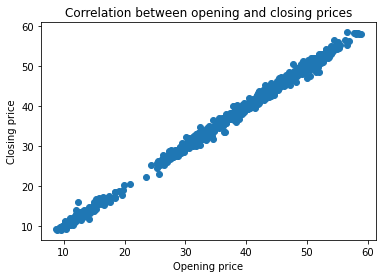

In [4]:
plt.scatter(stock['Open'],stock['Close'])  #The sctter tool in matplotlib packet
plt.title('Correlation between opening and closing prices')
plt.xlabel('Opening price')
plt.ylabel('Closing price')
plt.show()

It shows that these two figures are linearly dependent, which justifies that we can choose either one of them to represent stock price of that day.
And now, we should see if there is any relationship between stock price and volume.

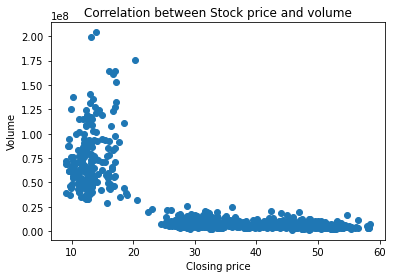

In [5]:
plt.scatter(stock['Close'],stock['Volume'])
plt.title('Correlation between Stock price and volume')
plt.xlabel('Closing price')
plt.ylabel('Volume')
plt.show()

This is pretty similar to a 1/x curve, so we paint another scatter plot with 1/Volume

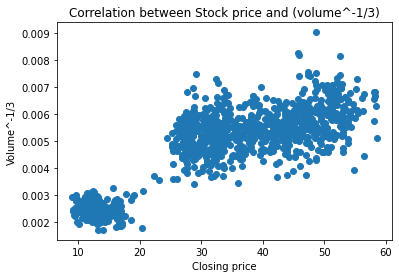

In [6]:
plt.scatter(stock['Close'],1/np.power(stock['Volume'],1/3))
plt.title('Correlation between Stock price and (volume^-1/3)')
plt.xlabel('Closing price')
plt.ylabel('Volume^-1/3')
plt.show()

This is nearly linear, compared to the curve of growth and fluctuation against stock price

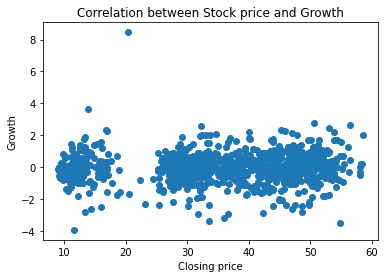

In [7]:
plt.scatter(stock['Close'],stock['Growth'])
plt.title('Correlation between Stock price and Growth')
plt.xlabel('Closing price')
plt.ylabel('Growth')
plt.show()

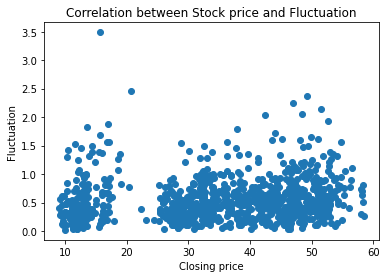

In [8]:
plt.scatter(stock['Close'],stock['Fluctuation'])
plt.title('Correlation between Stock price and Fluctuation')
plt.xlabel('Closing price')
plt.ylabel('Fluctuation')
plt.show()

Now we can have a look at the correlation between stock price and oil price. These two data have a different set of dates, since there are 1050 rows in stock price dataframe but only 1003 in oil price dataframe. So we have to take only the data in the dates which appear in both dataframe. One way to do it is by merging.

In [9]:
#Sort oil price
oil.sort_values('Date',inplace=True)

In [10]:
#Rename the datetime column in order to merge with oil price data
stock.rename(columns={'TimeKey':'Date'},inplace=True)

In [11]:
# Merging
result = pd.merge(stock, oil, on=['Date'])

In [12]:
print(result)

            Date  Open_x  Close_x  High_x  Low_x  Volume_x  Fluctuation  \
0     2017-01-03   47.28    46.30   47.34  46.14   6737800         0.22   
1     2017-01-04   46.63    46.70   47.44  46.35   5859600         1.02   
2     2017-01-05   46.52    45.89   46.93  45.61   6825300         0.69   
3     2017-01-06   45.85    46.21   46.72  45.47   7260200         0.89   
4     2017-01-09   46.01    47.08   47.34  45.78   4739100         0.49   
...          ...     ...      ...     ...    ...       ...          ...   
996   2020-12-24   16.04    15.66   16.04  15.53  29393443         0.13   
997   2020-12-28   15.97    16.06   16.46  15.91  56629125         0.46   
998   2020-12-29   16.32    15.86   16.41  15.75  49187272         0.20   
999   2020-12-30   15.85    16.15   16.20  15.72  47919183         0.18   
1000  2020-12-31   16.08    15.77   16.09  15.63  56555621         0.15   

      Growth  Close_y  Open_y  High_y  Low_y Volume_y Up/Down  
0       0.00    52.33   54.20   55.

Now we can plot the correlation scatter plot

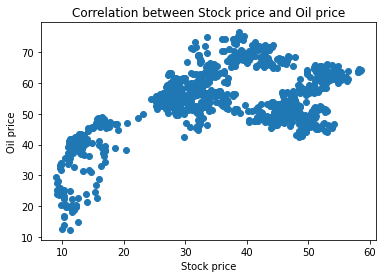

In [13]:
# Plot using result dataFrame
plt.scatter(result['Close_x'],result['Close_y'])
plt.title('Correlation between Stock price and Oil price')
plt.xlabel('Stock price')
plt.ylabel('Oil price')
plt.show()

Here is the part of plot before the pandemic

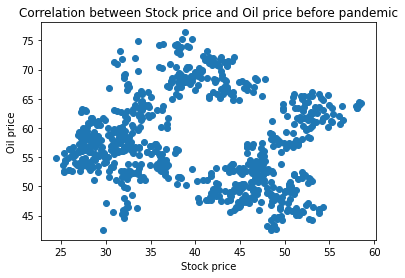

In [14]:
plt.scatter(result['Close_x'][0:770],result['Close_y'][0:770])
plt.title('Correlation between Stock price and Oil price before pandemic')
plt.xlabel('Stock price')
plt.ylabel('Oil price')
plt.show()

And after the pandemic

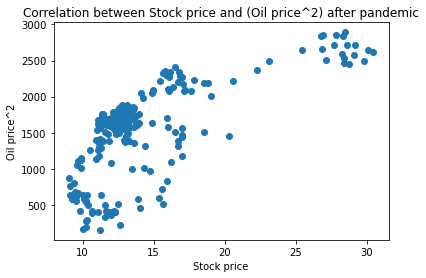

In [31]:
plt.scatter(result['Close_x'][771:],np.power(result['Close_y'][771:],2))
plt.title('Correlation between Stock price and (Oil price^2) after pandemic')
plt.xlabel('Stock price')
plt.ylabel('Oil price^2')
plt.show()

The plot is pretty much like a torus.
Here is the version with years

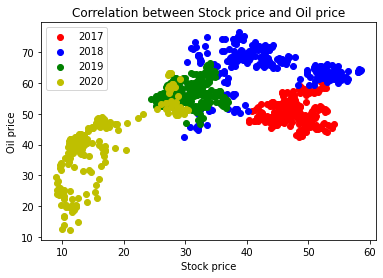

In [149]:
plt.scatter(result['Close_x'][0:251],result['Close_y'][0:251],c='r',label='2017')
plt.scatter(result['Close_x'][251:502],result['Close_y'][251:502],c='b',label='2018')
plt.scatter(result['Close_x'][502:754],result['Close_y'][502:754],c='g',label='2019')
plt.scatter(result['Close_x'][754:],result['Close_y'][754:],c='y',label='2020')
plt.title('Correlation between Stock price and Oil price')
plt.xlabel('Stock price')
plt.ylabel('Oil price')
plt.legend()
plt.show()

Considering the data only in 2020 after the pandemic, the oil price and stock price could be positively correlated